#### Dataset yang digunakan: 
https://www.kaggle.com/datasets/nikhileswarkomati/suicide-watch

#### Anggota kelompok 

1. Gregorius Ivan Halim 00000054295
2. Vidi Argio 00000063596
3. Gilbert Valerio Tanriono 00000058389
4. Edward Nathan 00000060182



#### Reading the dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#Clean the dataset
df = pd.read_csv("Suicide_Detection.csv")
df = df.drop(columns='Unnamed: 0')
df['class'] = df['class'].replace({'suicide': 'depressed', 'non-suicide': 'not-depressed'})

df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,depressed
1,Am I weird I don't get affected by compliments...,not-depressed
2,Finally 2020 is almost over... So I can never ...,not-depressed
3,i need helpjust help me im crying so hard,depressed
4,"I’m so lostHello, my name is Adam (16) and I’v...",depressed
...,...,...
232069,If you don't like rock then your not going to ...,not-depressed
232070,You how you can tell i have so many friends an...,not-depressed
232071,pee probably tastes like salty tea😏💦‼️ can som...,not-depressed
232072,The usual stuff you find hereI'm not posting t...,depressed


### Cleaning the dataset

In [3]:
extra_stop_words = ["na", "tri", "im", "wa", "get", "time", "even", "ha", "way", "see", "say", 
                    "still", "want", "know", "one", "day", "im", "ive", "u", "ha" "wa", "me", 
                    "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", 
                    "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", 
                    "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves",
                    "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
                    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did",
                    "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
                    "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during",
                    "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over",
                    "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all",
                    "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only",
                    "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "could", "people", "now"]

#### Sanitasi text


In [4]:
import wordninja
import re
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = (stopwords.words('english'))
stop_words.extend(extra_stop_words)

def add_spaces(text):
    words = wordninja.split(text)
    spaced_text = ' '.join(words)
    return spaced_text

def filter_all_unicodes(text):
    return re.sub(r'(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?|/r/', '', text)

def filter_numbers(text):
    return re.sub(r'\d+', '', text)

def filter_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words] 
    return ' '.join(filtered_words)

def clean_spaces(text):
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    return text


## proses sanitasi text
df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(add_spaces)
df['text'] = df['text'].apply(filter_all_unicodes)
df['text'] = df['text'].apply(filter_numbers)
df['text'] = df['text'].apply(filter_stopwords)
df['text'] = df['text'].apply(clean_spaces)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NAN0C\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,text,class
0,ex wife threatening suicide recently left wife...,depressed
1,weird dont affected compliments coming someone...,not-depressed
2,finally almost never hear bad year ever swear ...,not-depressed
3,need help help crying hard,depressed
4,lost hello name adam struggling years afraid p...,depressed
...,...,...
232069,dont like rock going anything go music taste s...,not-depressed
232070,tell many friends lonely everything deprived p...,not-depressed
232071,pee probably tastes like salty tea someone dra...,not-depressed
232072,usual stuff find posting sympathy pity far wor...,depressed


##### Stemming dalam dataset (Experimental) 

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import nltk
nltk.download('wordnet')

porter = PorterStemmer()

def porter_text(text):
    return ' '.join([porter.stem(word) for word in word_tokenize(text.lower())])

df['text'] = df['text'].apply(porter_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NAN0C\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Encoding column class menggunakan Label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
df['class'] = 1 - df['class']

df

,text,class
0,ex wife threaten suicid recent left wife good ...,1
1,weird dont affect compliment come someon irl f...,0
2,final almost never hear bad year ever swear fu...,0
3,need help help cri hard,1
4,lost hello name adam struggl year afraid past ...,1
...,...,...
232069,dont like rock go anyth go music tast space ma...,0
232070,tell mani friend lone everyth depriv pre bough...,0
232071,pee probabl tast like salti tea someon drank p...,0
232072,usual stuff find post sympathi piti far wors s...,1


##### plot 25 kata token yang paling banyak dalam teks

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

tokenized_text = df['text'].apply(nltk.word_tokenize)
all_words = [word for sublist in tokenized_text for word in sublist]
tokenized_text_df = pd.DataFrame({'word': all_words, 'count': 1})
tokenized_text_df = tokenized_text_df.groupby('word').sum().reset_index()
tokenized_text_df = tokenized_text_df.sort_values(by='count', ascending=False)

print(tokenized_text_df)


             word   count
16816        like  193055
10044        feel  172026
8079         dont  162427
11820          go  137131
16766        life  124610
...           ...     ...
6042       conven       1
6039       contum       1
22954     presser       1
6038   controvert       1
16792       liger       1

[33584 rows x 2 columns]


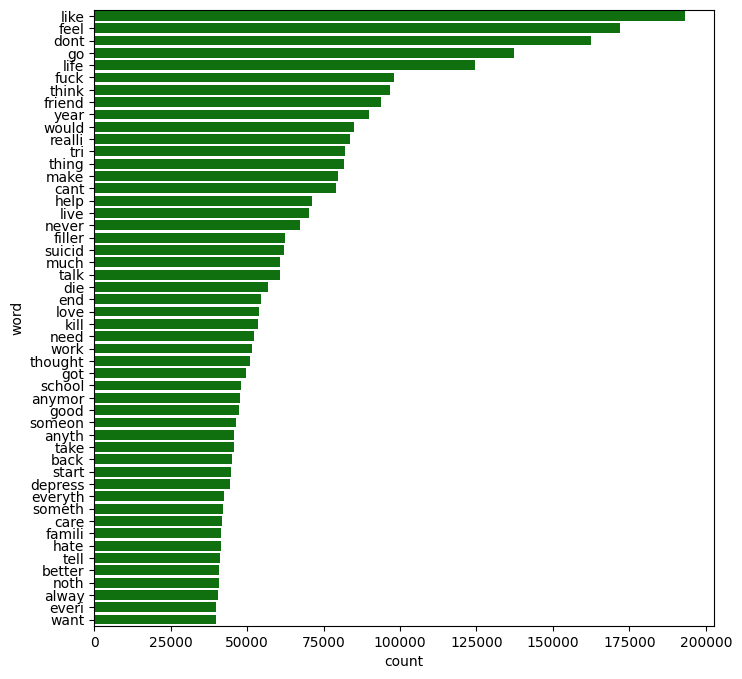

In [ ]:
plt.figure(figsize=(8,8))
sns.barplot(data=tokenized_text_df.iloc[:50], x='count', y='word',color='Green')

plt.show()

#### split the dataset

In [ ]:
X = df['text']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)

##### ukuran shape untuk masing X_train, dan X_test

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (162451,)
Shape of X_test: (69623,)
Shape of y_train: (162451,)
Shape of y_test: (69623,)


In [ ]:
df['text']

0         ex wife threaten suicid recent left wife good ...
1         weird dont affect compliment come someon irl f...
2         final almost never hear bad year ever swear fu...
3                                   need help help cri hard
4         lost hello name adam struggl year afraid past ...
                                ...                        
232069    dont like rock go anyth go music tast space ma...
232070    tell mani friend lone everyth depriv pre bough...
232071    pee probabl tast like salti tea someon drank p...
232072    usual stuff find post sympathi piti far wors s...
232073    havent beaten first boss hollow knight fought ...
Name: text, Length: 232074, dtype: object

#### Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)

X_train_Vectorized = vectorizer.fit_transform(X_train)
X_test_Vectorized = vectorizer.transform(X_test)

#### metode naive bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clf_multinomial = MultinomialNB(alpha=0.5)

clf_multinomial.fit(X_train_Vectorized, y_train)

MultinomialNB(alpha=0.5)

#### Classification report naive bayes

Multinomial Testing accuracy: 0.8927509587349008
Multinomial Testing Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.85      0.89     34881
           1       0.86      0.94      0.90     34742

    accuracy                           0.89     69623
   macro avg       0.90      0.89      0.89     69623
weighted avg       0.90      0.89      0.89     69623



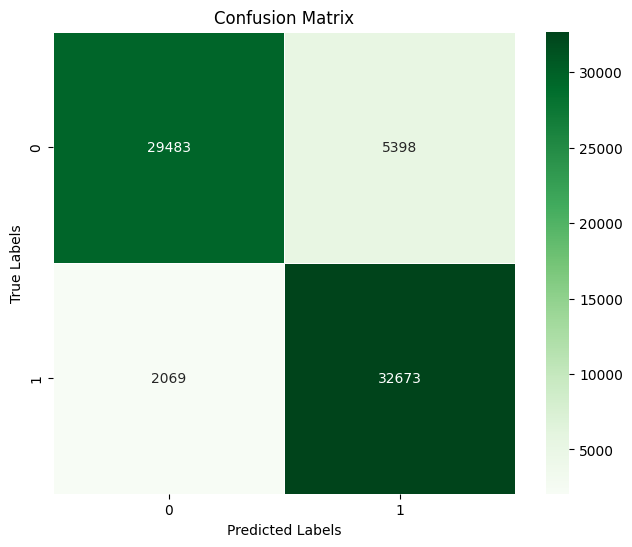

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


y_pred_multi = clf_multinomial.predict(X_test_Vectorized)
accuracy_multi = accuracy_score(y_test, y_pred_multi)
report_multi = classification_report(y_test, y_pred_multi)
cm_multi = confusion_matrix(y_test, y_pred_multi)

print("Multinomial Testing accuracy:", accuracy_multi)
print("Multinomial Testing Classification Report:\n", report_multi)


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_multi, annot=True, fmt="d", cmap="Greens", linewidths=.5, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#### Random Forest

In [ ]:

from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(n_estimators=100, n_jobs=10, max_features='sqrt')

clf_random_forest.fit(X_train_Vectorized, y_train)



RandomForestClassifier(n_jobs=10)

#### Classification report random forest

RandomForest Testing accuracy: 0.9128736193499275
RandomForest Testing Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.89      0.91     34881
           1       0.90      0.93      0.91     34742

    accuracy                           0.91     69623
   macro avg       0.91      0.91      0.91     69623
weighted avg       0.91      0.91      0.91     69623



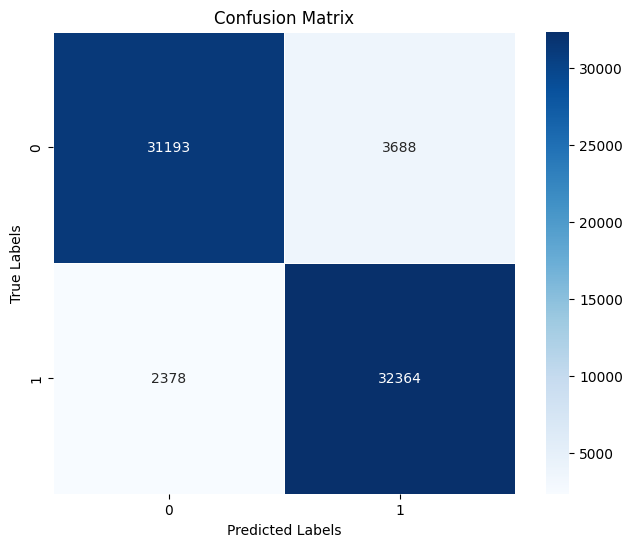

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_random_forest = clf_random_forest.predict(X_test_Vectorized)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
report_random_forest = classification_report(y_test, y_pred_random_forest)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

print("RandomForest Testing accuracy:", accuracy_random_forest)
print("RandomForest Testing Classification Report:\n", report_random_forest)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_random_forest, annot=True, fmt="d", cmap="Blues", linewidths=.5, square=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
